# Cars price prediction.
The goal of this notebook is to predict the prices of used cars in India.
Three important steps involved in this notebook are:
Data cleaning/ Feature engineering.
Exploratory Data Analysis.
Predicting the price of car using price using Machine Learning.



Source of Data - www.kaggle.com   

Kaggle, a subsidiary of Google LLC, is an online community of data scientists and machine learning practitioners. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges

# Read dataset
I'll read the dataset and get information about it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import sklearn
from pandas import Series 
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\mohdf\OneDrive\Desktop\Automobile.csv")

In [3]:
data.head(5)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


## CHECKING TO NUMBER OF UNIQUE VALUES

In [4]:
data.nunique()

car               87
price           1353
body               6
mileage          442
engV             117
engType            4
registration       2
year              56
model            888
drive              3
dtype: int64

## CONVERTING TEXT DATA INTO NUMERIC FORM USING LABEL ENCODER AND ONEHOT ENCODER

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['registration'] = le.fit_transform(data['registration'])
print(le.classes_)

['no' 'yes']


In [6]:
data.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [7]:
data = pd.get_dummies(data,columns = ["body","engType","drive"])

In [8]:
data.head(10)

,car,price,mileage,engV,registration,year,model,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Diesel,engType_Gas,engType_Other,engType_Petrol,drive_front,drive_full,drive_rear
0,Ford,15500.0,68,2.5,1,2010,Kuga,1,0,0,0,0,0,0,1,0,0,0,1,0
1,Mercedes-Benz,20500.0,173,1.8,1,2011,E-Class,0,0,0,1,0,0,0,1,0,0,0,0,1
2,Mercedes-Benz,35000.0,135,5.5,1,2008,CL 550,0,0,1,0,0,0,0,0,0,1,0,0,1
3,Mercedes-Benz,17800.0,162,1.8,1,2012,B 180,0,0,0,0,0,1,1,0,0,0,1,0,0
4,Mercedes-Benz,33000.0,91,NaN,1,2013,E-Class,0,0,0,0,1,0,0,0,1,0,0,0,0
5,Nissan,16600.0,83,2.0,1,2013,X-Trail,1,0,0,0,0,0,0,0,0,1,0,1,0
6,Honda,6500.0,199,2.0,1,2003,Accord,0,0,0,1,0,0,0,0,0,1,1,0,0
7,Renault,10500.0,185,1.5,1,2011,Megane,0,0,0,0,1,0,1,0,0,0,1,0,0
8,Mercedes-Benz,21500.0,146,1.8,1,2012,E-Class,0,0,0,1,0,0,0,1,0,0,0,0,1
9,Mercedes-Benz,22700.0,125,2.2,1,2010,E-Class,0,0,0,1,0,0,1,0,0,0,0,0,1


## CHECKING TOTAL NUMBER OF NAN VALUES IN A GIVEN DATA SET

In [9]:
data.isnull().head(10)

,car,price,mileage,engV,registration,year,model,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Diesel,engType_Gas,engType_Other,engType_Petrol,drive_front,drive_full,drive_rear
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

car                 0
price               0
mileage             0
engV              434
registration        0
year                0
model               0
body_crossover      0
body_hatch          0
body_other          0
body_sedan          0
body_vagon          0
body_van            0
engType_Diesel      0
engType_Gas         0
engType_Other       0
engType_Petrol      0
drive_front         0
drive_full          0
drive_rear          0
dtype: int64

## DROPPING ALL ROWS HAVING NAN VALUES

In [11]:
data =data.dropna()

## IMPORTING OUR CLEAN DATA SET

In [12]:
data32= data.to_csv("C:\\Users\mohdf\OneDrive\Documents\data32.csv")

In [13]:
data32

## GETTING MORE INFORMATION FROM OUR DATA SET

In [14]:
data.head(10)

,car,price,mileage,engV,registration,year,model,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Diesel,engType_Gas,engType_Other,engType_Petrol,drive_front,drive_full,drive_rear
0,Ford,15500.000,68,2.5,1,2010,Kuga,1,0,0,0,0,0,0,1,0,0,0,1,0
1,Mercedes-Benz,20500.000,173,1.8,1,2011,E-Class,0,0,0,1,0,0,0,1,0,0,0,0,1
2,Mercedes-Benz,35000.000,135,5.5,1,2008,CL 550,0,0,1,0,0,0,0,0,0,1,0,0,1
3,Mercedes-Benz,17800.000,162,1.8,1,2012,B 180,0,0,0,0,0,1,1,0,0,0,1,0,0
5,Nissan,16600.000,83,2.0,1,2013,X-Trail,1,0,0,0,0,0,0,0,0,1,0,1,0
6,Honda,6500.000,199,2.0,1,2003,Accord,0,0,0,1,0,0,0,0,0,1,1,0,0
7,Renault,10500.000,185,1.5,1,2011,Megane,0,0,0,0,1,0,1,0,0,0,1,0,0
8,Mercedes-Benz,21500.000,146,1.8,1,2012,E-Class,0,0,0,1,0,0,0,1,0,0,0,0,1
9,Mercedes-Benz,22700.000,125,2.2,1,2010,E-Class,0,0,0,1,0,0,1,0,0,0,0,0,1
10,Nissan,20447.154,0,1.2,1,2016,Qashqai,1,0,0,0,0,0,0,0,0,1,1,0,0


In [15]:
data.isnull().sum()

car               0
price             0
mileage           0
engV              0
registration      0
year              0
model             0
body_crossover    0
body_hatch        0
body_other        0
body_sedan        0
body_vagon        0
body_van          0
engType_Diesel    0
engType_Gas       0
engType_Other     0
engType_Petrol    0
drive_front       0
drive_full        0
drive_rear        0
dtype: int64

In [16]:
data.shape

(9142, 20)

In [17]:
data.size

182840

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9142 entries, 0 to 9575
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car             9142 non-null   object 
 1   price           9142 non-null   float64
 2   mileage         9142 non-null   int64  
 3   engV            9142 non-null   float64
 4   registration    9142 non-null   int32  
 5   year            9142 non-null   int64  
 6   model           9142 non-null   object 
 7   body_crossover  9142 non-null   uint8  
 8   body_hatch      9142 non-null   uint8  
 9   body_other      9142 non-null   uint8  
 10  body_sedan      9142 non-null   uint8  
 11  body_vagon      9142 non-null   uint8  
 12  body_van        9142 non-null   uint8  
 13  engType_Diesel  9142 non-null   uint8  
 14  engType_Gas     9142 non-null   uint8  
 15  engType_Other   9142 non-null   uint8  
 16  engType_Petrol  9142 non-null   uint8  
 17  drive_front     9142 non-null   u

In [19]:
data.describe()

,price,mileage,engV,registration,year,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Diesel,engType_Gas,engType_Other,engType_Petrol,drive_front,drive_full,drive_rear
count,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000,9142.000000
mean,15606.644973,139.887005,2.646344,0.942135,2006.602932,0.219646,0.125902,0.085758,0.380333,0.076788,0.111573,0.323124,0.181908,0.029972,0.464997,0.543973,0.267338,0.144607
std,24060.337206,97.881736,5.927699,0.233500,6.975465,0.414029,0.331758,0.280022,0.485495,0.266270,0.314858,0.467695,0.385790,0.170518,0.498801,0.498090,0.442594,0.351724
min,0.000000,0.000000,0.100000,0.000000,1959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4999.250000,70.000000,1.600000,1.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9200.000000,129.000000,2.000000,1.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16737.500000,195.000000,2.500000,1.000000,2012.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,547800.000000,999.000000,99.990000,1.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# IMPLEMENTING MACHINE LEARNING ALGORITHM FOR PREDICTION

In [20]:
data.head()

,car,price,mileage,engV,registration,year,model,body_crossover,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Diesel,engType_Gas,engType_Other,engType_Petrol,drive_front,drive_full,drive_rear
0,Ford,15500.0,68,2.5,1,2010,Kuga,1,0,0,0,0,0,0,1,0,0,0,1,0
1,Mercedes-Benz,20500.0,173,1.8,1,2011,E-Class,0,0,0,1,0,0,0,1,0,0,0,0,1
2,Mercedes-Benz,35000.0,135,5.5,1,2008,CL 550,0,0,1,0,0,0,0,0,0,1,0,0,1
3,Mercedes-Benz,17800.0,162,1.8,1,2012,B 180,0,0,0,0,0,1,1,0,0,0,1,0,0
5,Nissan,16600.0,83,2.0,1,2013,X-Trail,1,0,0,0,0,0,0,0,0,1,0,1,0


In [21]:
data.nunique()

car                 84
price             1307
mileage            438
engV               117
registration         2
year                54
model              869
body_crossover       2
body_hatch           2
body_other           2
body_sedan           2
body_vagon           2
body_van             2
engType_Diesel       2
engType_Gas          2
engType_Other        2
engType_Petrol       2
drive_front          2
drive_full           2
drive_rear           2
dtype: int64

In [22]:
X = data.iloc[:,[2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]].values

In [23]:
y = data.iloc[:,1].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [25]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([16084.23537558, 15067.23625772, 13413.79582567, ...,
       11707.20724146, 35488.81731419,  9277.12466026])

In [29]:
y_test

array([ 6600., 14200., 10800., ...,  7300., 25999.,  1150.])

In [30]:
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  29.185165421709037


In [31]:
y_test.mean()

15145.536953973751

In [32]:
y_pred.mean()

15985.251753044835

# VISUALISATION THROUGH MATPLOTLIB AND SEABORN

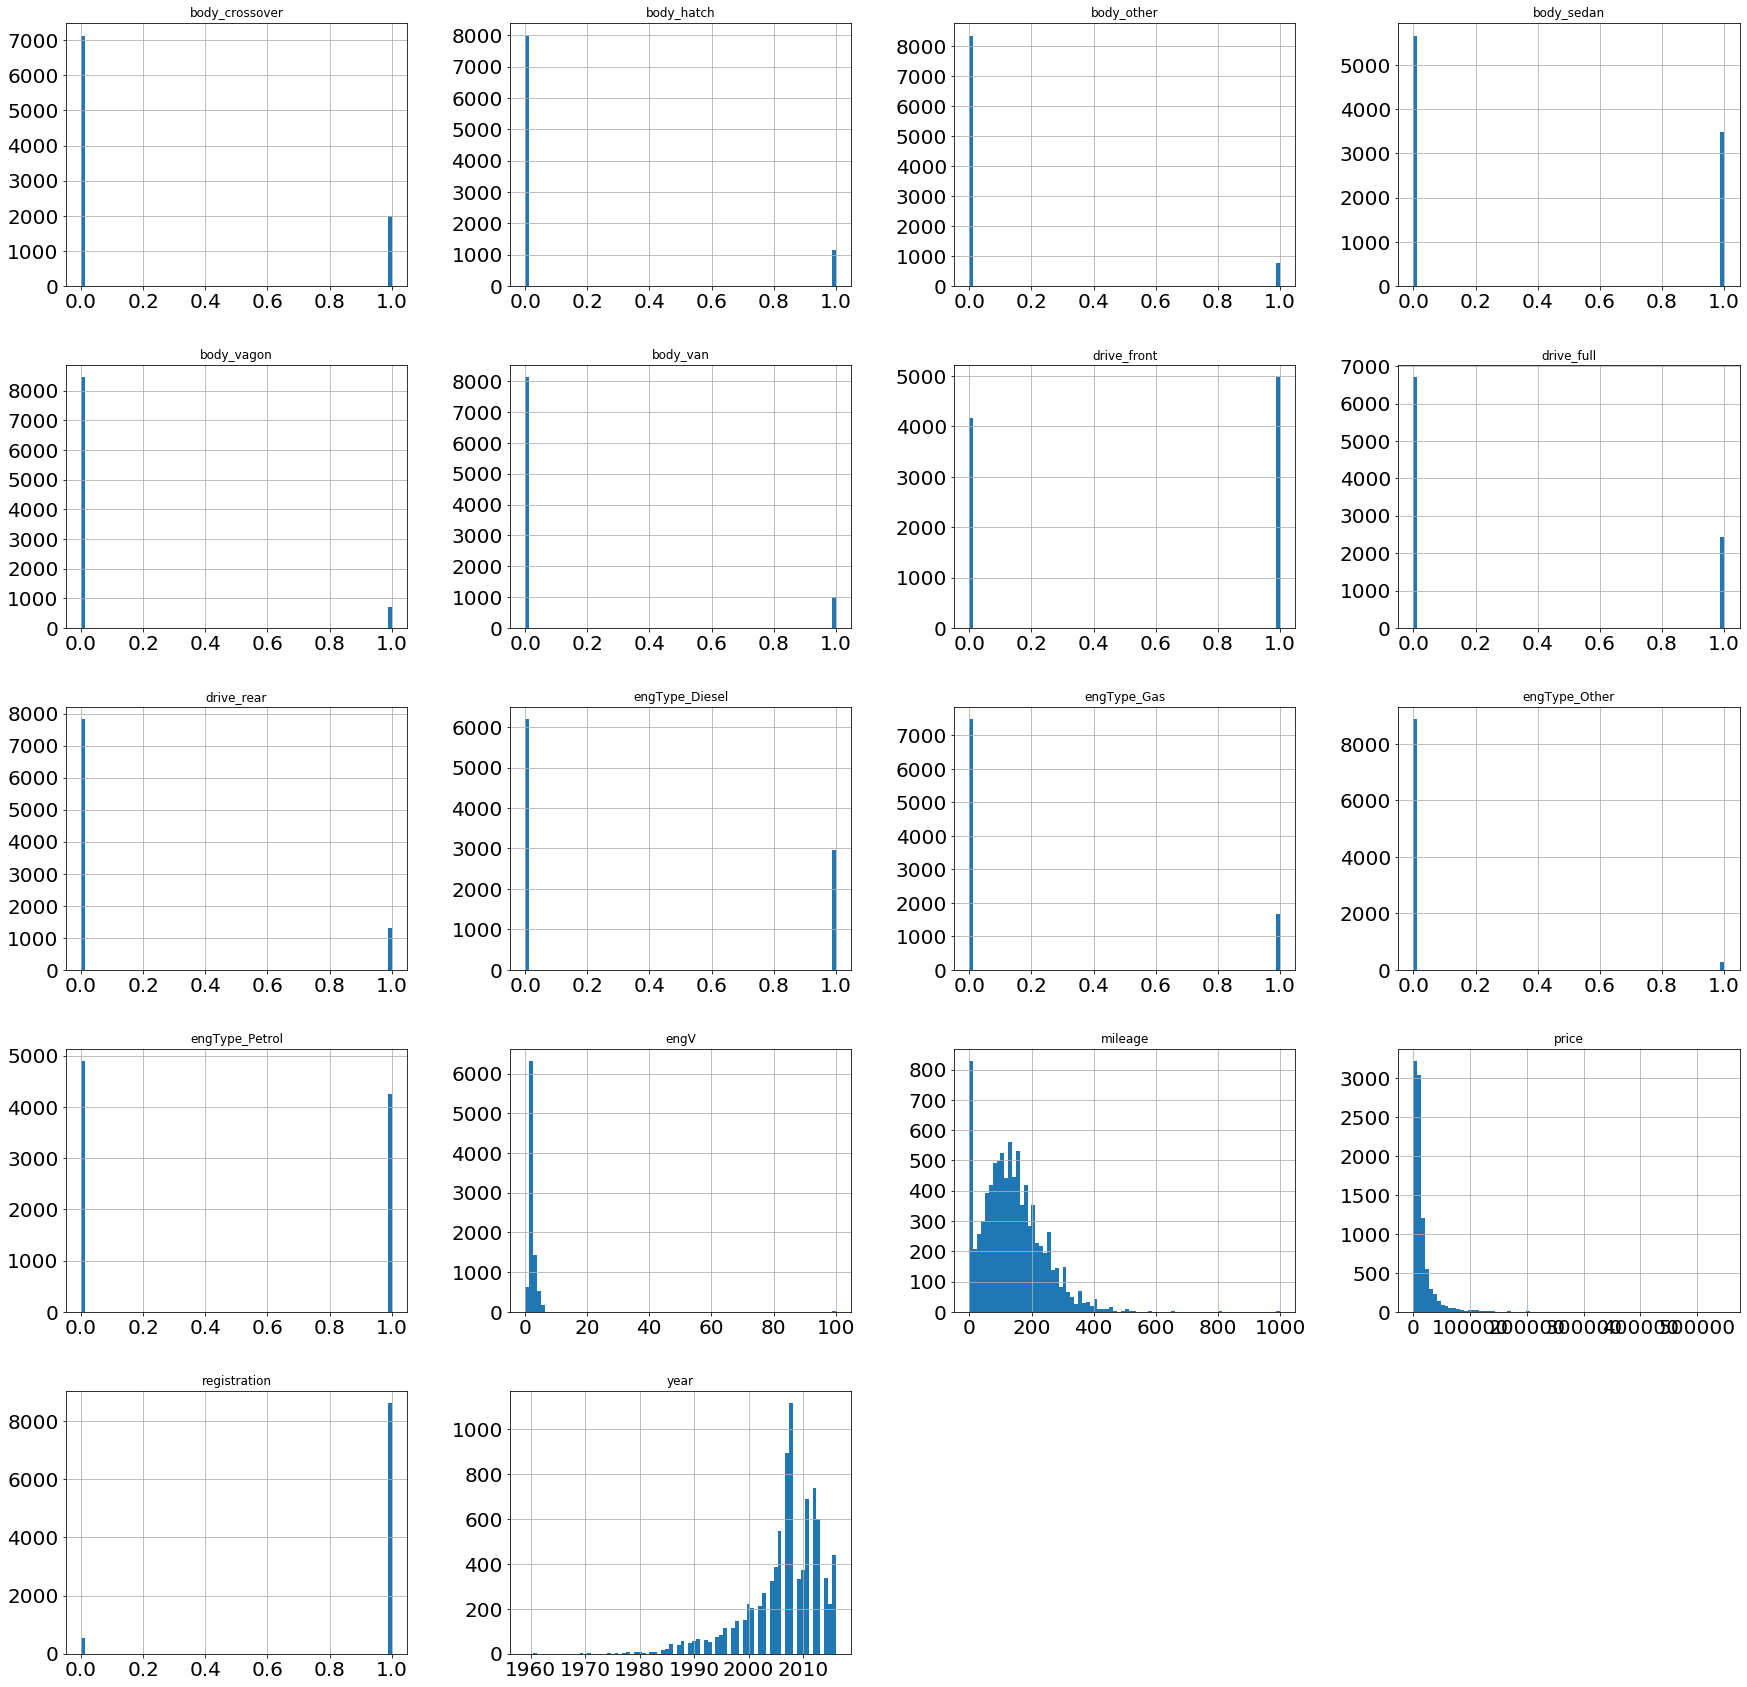

In [33]:
import matplotlib.pyplot as plt
data.hist(bins=80, figsize=(30,30),xlabelsize=20,ylabelsize=20,grid=True)
plt.show()

## checking Correlation using heatmap

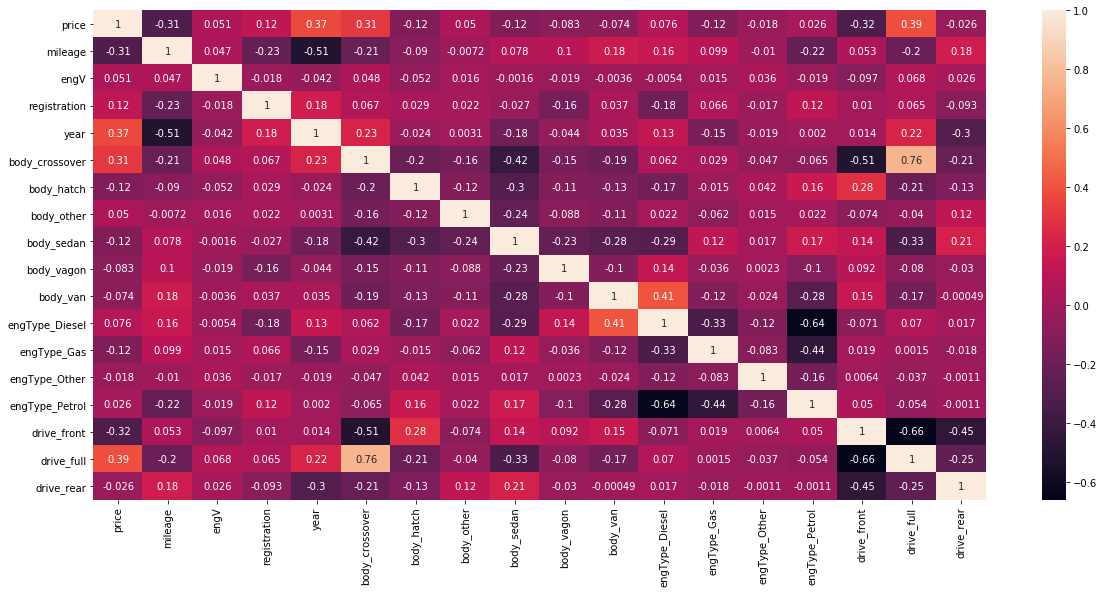

In [34]:
corr = data.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)
plt.show()

In [35]:
y_pred

array([16084.23537558, 15067.23625772, 13413.79582567, ...,
       11707.20724146, 35488.81731419,  9277.12466026])

In [36]:
y_test

array([ 6600., 14200., 10800., ...,  7300., 25999.,  1150.])

In [37]:
df1 =pd.DataFrame({"y_pred": y_pred})

In [38]:
df2 = pd.DataFrame({"y_test": y_test})

In [39]:
df3 = df1.loc[0:50].astype(float)

In [40]:
df4 = df2.loc[0:50].astype(float)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2743 entries, 0 to 2742
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_pred  2743 non-null   float64
dtypes: float64(1)
memory usage: 21.6 KB


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2743 entries, 0 to 2742
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_test  2743 non-null   float64
dtypes: float64(1)
memory usage: 21.6 KB


In [43]:
data4 = data.append(df1, ignore_index=False, verify_integrity=False, sort=None)

In [45]:
data4 = data4.append(df2, ignore_index=False, verify_integrity=False, sort=None)

In [46]:
data4.to_csv("D:\data4.csv")

## we have completed all the required steps for making predictions using Regression.